# Southern Resident Killer Whale Birth Rate Data

By: Amy, Aiden, and Mark


In [2]:
%matplotlib inline

from modsim import *
from pandas import read_html
from math import *



Birth Rate Data

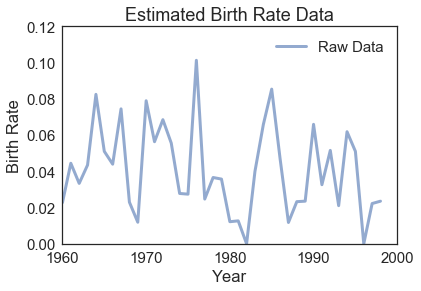

In [3]:
#setup overall population data tables
pop_data_source = 'Data/PopulationData.html' #NEED TO UPDATE ############################
pop_data = read_html(pop_data_source, header=1, index_col=0)
pop_table = pop_data[0]
pop_table.columns = ['year', 'population']

#setup birth data tables
birth_data_source = 'Data/BirthsPerYear.html'
birth_data = read_html(birth_data_source, header=1, index_col=0)
birth_table = birth_data[0]
birth_table.columns = ['year', 'births']

system = System(
    t_start = 1960, #NEED TO CHANGE ############################
    t_end = 2017,    #NEED TO CHANGE ############################
)

birth_table_size = 40
pop_table_size = 40 #NEED TO CHANGE ############################

def create_table(t_start, t_end):
    results = TimeSeries()
    for i in linrange(2, pop_table_size):
        total_current_whales = pop_table.population[i]
        current_year = i + system.t_start - 2
        total_whales_born = birth_table.births[i]
        results[current_year] = total_whales_born / total_current_whales
    return results

raw_percentage_data = create_table(system.t_start, system.t_end)
newfig()
plot(raw_percentage_data, label = 'Raw Data')
decorate(xlim = [1960, 2000], #NEED TO CHANGE ############################
         ylim = [0, .12],
         xlabel='Year', 
         ylabel='Birth Rate',
         title='Estimated Birth Rate Data')

Death Rate Data

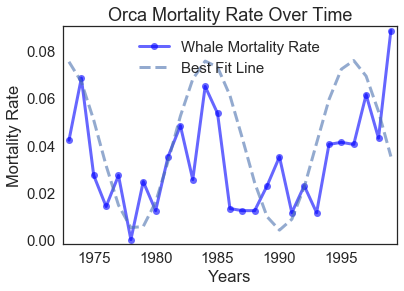

In [4]:
filename = 'data/WhaleMortalityRateOverall.html'
table = read_html(filename, header=0, index_col=0)
rates = table[0]
rates.columns =['Year', 'MR']

A = .036
omega = pi/5.8
beta = 7.5

array = [1973,  1974,  1975,  1976,  1977,  1978,  1979,  1980,
        1981,  1982,  1983,  1984,  1985,  1986,  1987,  1988,
        1989,  1990,  1991,  1992,  1993,  1994,  1995,  1996,
        1997,  1998,  1999]

BestFit = []
for i in array:
    BestFit.append(A*sin(omega*i + beta) + 0.04)

newfig()
plot(rates.Year[13:], rates.MR[13:], 'bo-', label='Whale Mortality Rate')
plot(rates.Year[13:], BestFit, '--', label='Best Fit Line')
decorate(xlabel='Years', ylabel='Mortality Rate', title='Orca Mortality Rate Over Time')

Whale Population Data

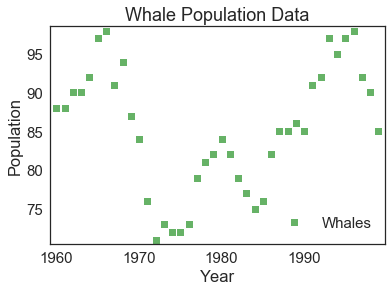

In [5]:
whale_file = 'Data/PopulationData.html'

population_table = read_html(whale_file, header=0, index_col=0)

table = population_table[0]
table.columns = ['Year', 'Population']
table
newfig()
plot(table.Year, table.Population, 'gs', label = 'Whales') 
decorate(title = 'Whale Population Data', xlabel = 'Year', ylabel = 'Population')

Projections

In [6]:
#projected_birth_chance = TimeSeries of year vs individual birth chance (should be from the random library)first year is 2000, last 2050
#projected_death_chance = same for death

p0 = 85 #the initial population
t0 = 2000 #first year of the simulation
tf = 2050 #last year of the simulation

A = .036
omega = pi/5.8
beta = 7.5

def predict_death_chance(year):
    death_chance = A*sin(omega*year + beta) + 0.04
    return death_chance

def project_year(population, year, birth_chance):
    """
    Returns the net change in population for a given year
    
    population = the current population
    year = the current year
    """
    births = 0
    deaths = 0
    death_chance = predict_death_chance(year)
    for i in range(population):
        if flip(birth_chance):
            births += 1
        if flip(death_chance):
            deaths += 1
    net_change = births - deaths 
    return net_change

def run_simulation(t0 = t0, tf = tf, p0 = p0, birth_chance = None):
    """
    Projects each year stochasically and returns the results in a TimeSeries
    
    t0 = first year
    tf = last year
    p0 = initial population
    """
    results = TimeSeries()
    results[t0] = p0
    #print(results)
    for i in range(t0, tf):
        net_change = project_year(results[i], i, birth_chance)
        results[i+1] = results[i] + net_change
    return results

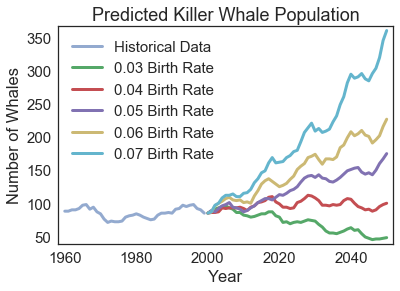

In [7]:
#Just running it a few times to make sure it's always different
def run_simulations(n, birth_chance, color):
    for i in range(n):
        population = run_simulation(birth_chance = birth_chance)
        plot(population, color, alpha = .05)

population1 = run_simulation(birth_chance = 0.03)
population2 = run_simulation(birth_chance = 0.04)
population3 = run_simulation(birth_chance = 0.05) 
population4 = run_simulation(birth_chance = 0.06) 
population5 = run_simulation(birth_chance = 0.07) 

plot(table.Year, table.Population, label = 'Historical Data') 
plot(population1, label = '0.03 Birth Rate', alpha = 1)
plot(population2, label = '0.04 Birth Rate', alpha = 1)
plot(population3, label = '0.05 Birth Rate', alpha = 1)
plot(population4, label = '0.06 Birth Rate', alpha = 1)
plot(population5, label = '0.07 Birth Rate', alpha = 1)

decorate(xlabel='Year', ylabel='Number of Whales', title='Predicted Killer Whale Population')

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


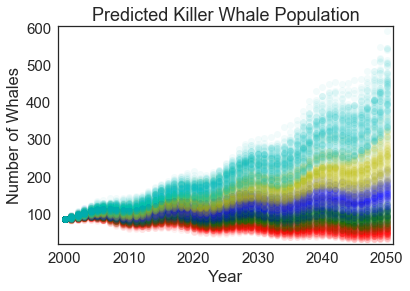

In [11]:
run_simulations(100, 0.03, 'ro')
run_simulations(100, 0.04, 'go')
run_simulations(100, 0.05, 'bo')
run_simulations(100, 0.06, 'yo')
run_simulations(100, 0.07, 'co')

decorate(xlabel='Year', ylabel='Number of Whales', title='Predicted Killer Whale Population', label = 'test')